In [1]:
%load_ext autoreload
%autoreload 2

# Testing train_model
The purpose of this notebook is to test the functionality of the `train_model` function in the `training.py` script.

## Imports

In [2]:
from functools import partial

import jax
import jax.numpy as jnp
from jax import random
from flax import linen as nn
from modularRNN.model import CTRNNCell
from modularRNN.task import ModularArithmeticTask
from modularRNN.training import create_train_state, compute_custom_accuracy, train_model

import matplotlib.pyplot as plt

In [3]:
key = random.PRNGKey(0)

## Create testing and training datasets

In [4]:
key, subkey = random.split(key)
training_trials = 3200
testing_trials = 320
train_batch_size = 128
mod_set = jnp.array([5])
pulse_distribution = partial(random.poisson, lam=8)
trial_length = 100

modtask = ModularArithmeticTask(
    subkey, 
    training_trials, 
    testing_trials, 
    train_batch_size, 
    mod_set, 
    pulse_distribution, 
    trial_length, 
)
training_dataset, testing_dataset = modtask.tf_datasets()

100%|███████████████████████████████████████| 320/320 [00:00<00:00, 1007.30it/s]


## Create CT-RNN

In [5]:
features = 100
alpha = jnp.float32(0.1)
noise = jnp.float32(0.01)
out_shape = 10

ctrnn = nn.RNN(CTRNNCell(features=features, alpha=alpha, noise=noise, out_shape=out_shape,))

## Train CT-RNN

In [6]:
lr = 0.01
weight_decay = 0.0001
l2_penalty = 0.0001
epochs = 500

In [7]:
key, subkey = random.split(key)
state = create_train_state(ctrnn, subkey, lr, weight_decay, trial_length)

In [8]:
key, subkey = random.split(key)
results = train_model(
    subkey, 
    state, 
    training_dataset, 
    testing_dataset, 
    epochs,
    l2_penalty,
)

2024-04-05 23:37:24.869028: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:37:27.746834: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:37:29.972521: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:37:32.002189: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:37:34.053786: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:37:36.032285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:37:38.011659: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 50:
train_loss: 0.06965552270412445
test_loss: 0.0694977417588234




2024-04-05 23:39:07.473424: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:39:09.453969: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:39:11.450643: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:39:13.464878: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:39:15.410241: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:39:17.399606: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:39:19.383194: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 100:
train_loss: 0.05515875294804573
test_loss: 0.052758436650037766




2024-04-05 23:40:50.653844: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:40:52.915626: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:40:55.086646: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:40:57.049993: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:40:59.054806: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:41:01.042581: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:41:02.997523: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 150:
train_loss: 0.03225432708859444
test_loss: 0.03035457618534565




2024-04-05 23:42:30.893574: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:42:32.898193: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:42:34.860109: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:42:36.886719: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:42:38.898373: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:42:40.879396: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:42:42.857823: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 200:
train_loss: 0.022678185254335403
test_loss: 0.020513491705060005




2024-04-05 23:44:10.883734: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:44:12.876328: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:44:14.886500: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:44:16.832792: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:44:18.949180: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:44:20.913325: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:44:22.918005: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 250:
train_loss: 0.01747107319533825
test_loss: 0.015607583336532116




2024-04-05 23:45:51.228775: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:45:53.199816: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:45:55.208394: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:45:57.213845: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:45:59.244311: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:46:01.208009: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:46:03.158692: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 300:
train_loss: 0.015630794689059258
test_loss: 0.014129824005067348




2024-04-05 23:47:31.053766: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:47:33.047794: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:47:35.067602: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:47:37.080845: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:47:39.087498: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:47:41.090790: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:47:43.094236: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 350:
train_loss: 0.04143701121211052
test_loss: 0.03811945021152496




2024-04-05 23:49:10.955226: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:49:12.912440: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:49:14.874104: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:49:16.842329: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:49:18.814052: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:49:20.820253: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:49:22.801615: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 400:
train_loss: 0.026194078847765923
test_loss: 0.024067606776952744




2024-04-05 23:50:50.319611: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:50:52.349721: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:50:54.344597: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:50:56.337851: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:50:58.322607: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:51:00.285227: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:51:02.292881: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 450:
train_loss: 0.021956002339720726
test_loss: 0.020475802943110466




2024-04-05 23:52:29.717019: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:52:31.707503: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:52:33.693497: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:52:35.697444: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:52:37.710722: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:52:39.671826: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-05 23:52:41.659830: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 500:
train_loss: 0.02120371349155903
test_loss: 0.018397530540823936




2024-04-05 23:54:07.412558: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Test CT-RNN

In [9]:
for _inputs, _outputs in testing_dataset.as_numpy_iterator():
    pass

2024-04-05 23:54:07.640265: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [10]:
key, subkey = random.split(key)
z_0, rates_0 = ctrnn.apply(results["min_test_loss_params"].params, _inputs, init_key=subkey,)

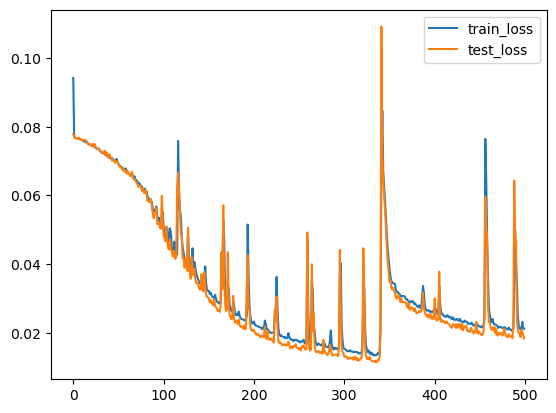

In [11]:
plt.plot(results['metrics_history'].history['train_loss'], label='train_loss')
plt.plot(results['metrics_history'].history['test_loss'], label='test_loss')
plt.legend()
plt.show()

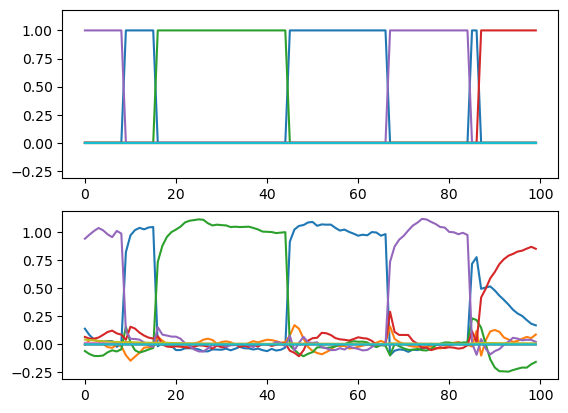

In [12]:
fig, axs = plt.subplots(2, 1, sharey=True)

axs[0].plot(_outputs[0,:,:])
axs[1].plot(z_0[0,:,:])

plt.show()

In [13]:
results['metrics_history'].save_to_csv('../data/script_tests/metrics_history.csv')

## Test compute_custom_accuracy

In [14]:
accuracy = compute_custom_accuracy(_outputs, z_0,)
accuracy

Array(0.9361563, dtype=float32)

## Test trial_length variable

In [15]:
key, subkey = random.split(key)
training_trials = 640
testing_trials = 640
train_batch_size = 640
mod_set = jnp.array([5])
pulse_distribution = partial(random.poisson, lam=16)
trial_length = 500

modtask = ModularArithmeticTask(
    subkey, 
    training_trials, 
    testing_trials, 
    train_batch_size, 
    mod_set, 
    pulse_distribution, 
    trial_length, 
)
training_dataset, testing_dataset = modtask.tf_datasets()

100%|████████████████████████████████████████| 640/640 [00:00<00:00, 667.27it/s]


2024-04-05 23:54:13.186078: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


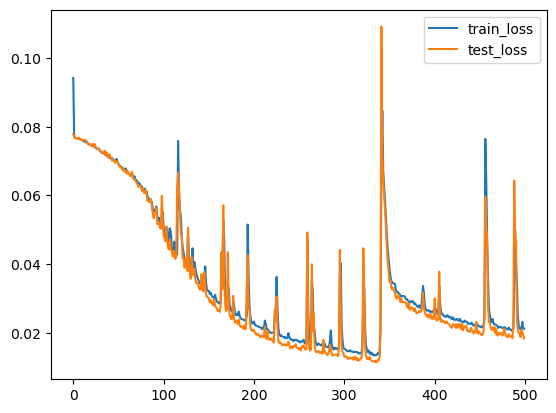

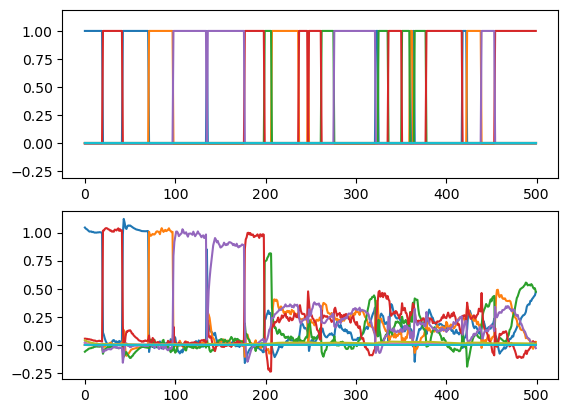

Array(0.65545934, dtype=float32)

In [16]:
for _inputs, _outputs in testing_dataset.as_numpy_iterator():
    pass

key, subkey = random.split(key)
z_0, rates_0 = ctrnn.apply(results["min_test_loss_params"].params, _inputs, init_key=subkey,)

plt.plot(results['metrics_history'].history['train_loss'], label='train_loss')
plt.plot(results['metrics_history'].history['test_loss'], label='test_loss')
plt.legend()
plt.show()

fig, axs = plt.subplots(2, 1, sharey=True)

axs[0].plot(_outputs[0,:,:])
axs[1].plot(z_0[0,:,:])

plt.show()

accuracy = compute_custom_accuracy(_outputs, z_0,)
accuracy